Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

Data Loading and Preparation

In [ ]:
ratings = pd.read_csv(r'E:\University of adelaide\25_trimester_2\big_data_project\assignment_2\data\ratings.csv')
books = pd.read_csv(r'E:\University of adelaide\25_trimester_2\big_data_project\assignment_2\data\books.csv')
book_tags = pd.read_csv(r'E:\University of adelaide\25_trimester_2\big_data_project\assignment_2\data\book_tags.csv')
tags = pd.read_csv(r'E:\University of adelaide\25_trimester_2\big_data_project\assignment_2\data\tags.csv')

# Merging datasets
ratings_count = ratings.groupby('book_id').size().reset_index(name='ratings_count')
avg_rating = ratings.groupby('book_id')['rating'].mean().reset_index(name='avg_rating')
books = books.merge(ratings_count, left_on='book_id', right_on='book_id')
books = books.merge(avg_rating, left_on='book_id', right_on='book_id')

### Univariate Analysis

Rating Distribution

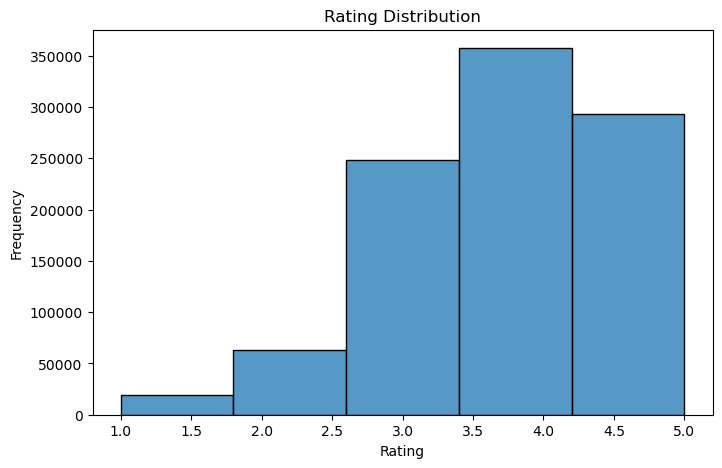

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=5, kde=False)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Ratings per User

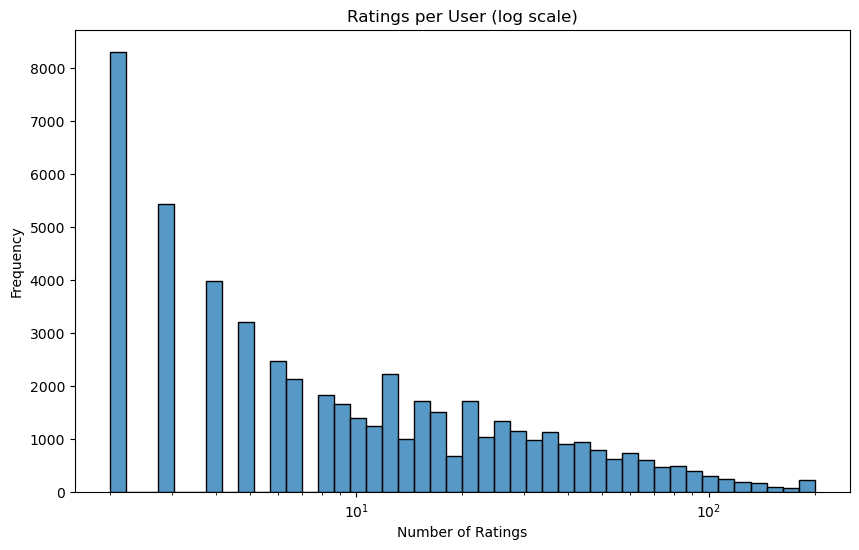

In [ ]:
ratings_per_user = ratings.groupby('user_id').size()
plt.figure(figsize=(10,6))
sns.histplot(ratings_per_user, log_scale=True)
plt.title('Ratings per User (log scale)')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

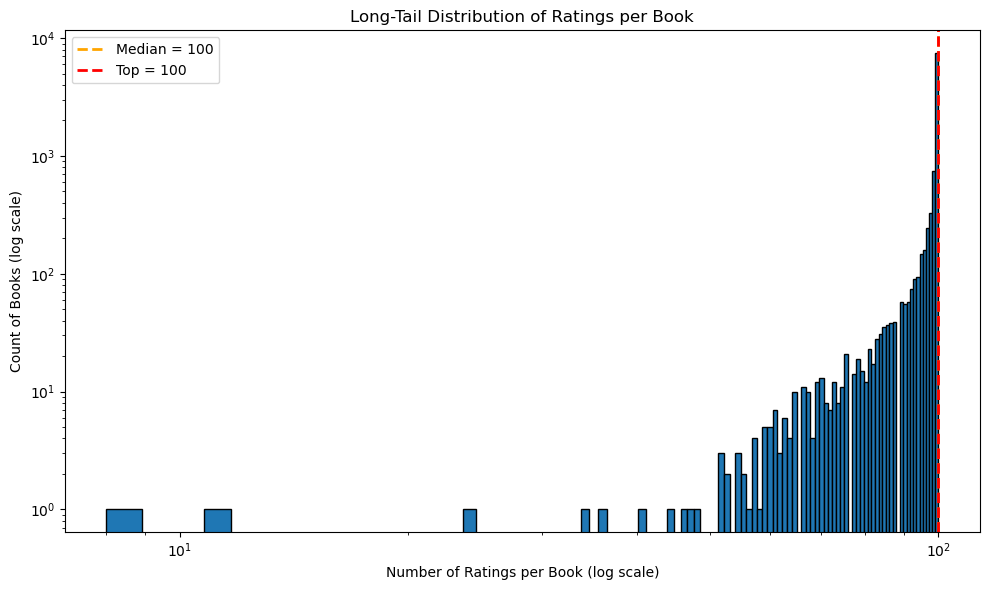

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Compute number of ratings per book
ratings_per_book = ratings['book_id'].value_counts()

# Summary statistics
median_count = ratings_per_book.median()
top_book_id = ratings_per_book.idxmax()
top_count = ratings_per_book.max()

# Plot histogram on log-log axes to show the long-tail distribution
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_book, bins=100, log=True, edgecolor='black')
plt.xscale('log')
plt.axvline(median_count, color='orange', linestyle='--', linewidth=2, label=f'Median = {median_count:.0f}')
plt.axvline(top_count, color='red', linestyle='--', linewidth=2, label=f'Top = {top_count:.0f}')
plt.title('Long-Tail Distribution of Ratings per Book')
plt.xlabel('Number of Ratings per Book (log scale)')
plt.ylabel('Count of Books (log scale)')
plt.legend()
plt.tight_layout()
plt.show()


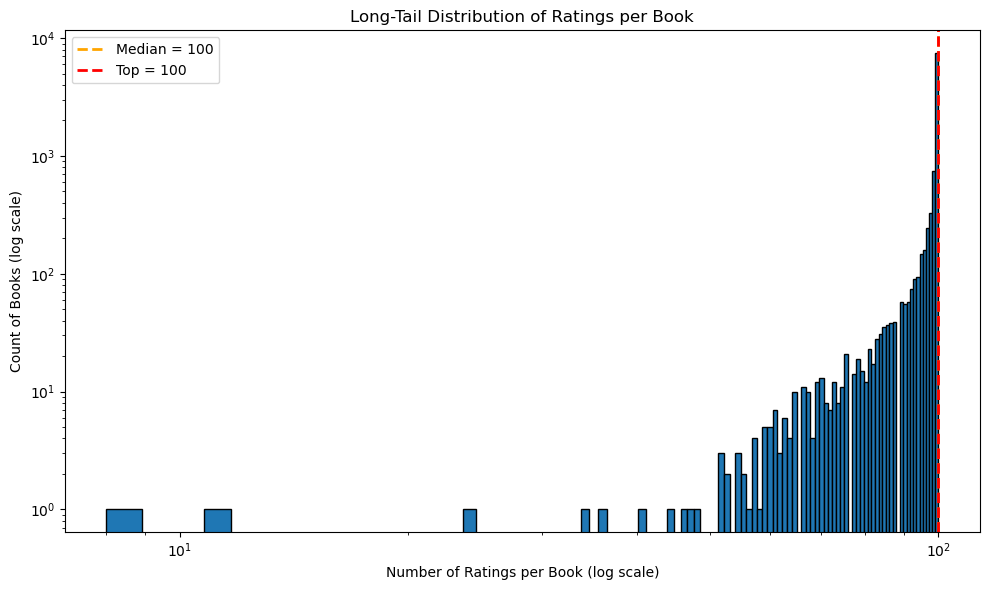

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Compute number of ratings per book
ratings_per_book = ratings['book_id'].value_counts()

# Summary statistics
median_count = ratings_per_book.median()
top_count = ratings_per_book.max()

# Plot histogram on log-log scale
plt.figure(figsize=(10, 6))
plt.hist(ratings_per_book, bins=100, log=True, edgecolor='black')
plt.xscale('log')
plt.axvline(median_count, color='orange', linestyle='--', linewidth=2, label=f'Median = {median_count:.0f}')
plt.axvline(top_count, color='red', linestyle='--', linewidth=2, label=f'Top = {top_count:.0f}')
plt.title('Long-Tail Distribution of Ratings per Book')
plt.xlabel('Number of Ratings per Book (log scale)')
plt.ylabel('Count of Books (log scale)')
plt.legend()
plt.tight_layout()
plt.show()


Mean of book averages: 3.86
Std dev of book averages: 0.30
Median of book averages: 3.87
25th percentile: 3.67
75th percentile: 4.06
% of books avg < 3.0: 0.7%


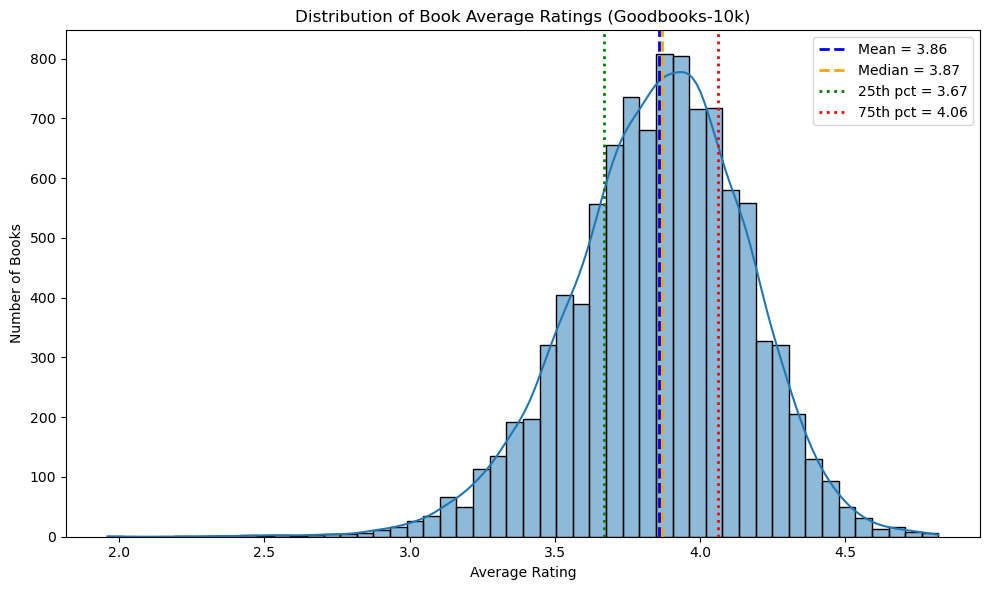

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average rating per book
avg_ratings = ratings.groupby('book_id')['rating'].mean()

# Compute descriptive statistics
mean_avg = avg_ratings.mean()
std_avg  = avg_ratings.std()
median_avg = avg_ratings.median()
q25 = avg_ratings.quantile(0.25)
q75 = avg_ratings.quantile(0.75)
pct_below_3 = (avg_ratings < 3.0).mean() * 100

print(f"Mean of book averages: {mean_avg:.2f}")
print(f"Std dev of book averages: {std_avg:.2f}")
print(f"Median of book averages: {median_avg:.2f}")
print(f"25th percentile: {q25:.2f}")
print(f"75th percentile: {q75:.2f}")
print(f"% of books avg < 3.0: {pct_below_3:.1f}%")

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(avg_ratings, bins=50, kde=True)
plt.axvline(mean_avg, color='blue', linestyle='--', linewidth=2, label=f'Mean = {mean_avg:.2f}')
plt.axvline(median_avg, color='orange', linestyle='--', linewidth=2, label=f'Median = {median_avg:.2f}')
plt.axvline(q25, color='green', linestyle=':', linewidth=2, label=f'25th pct = {q25:.2f}')
plt.axvline(q75, color='red', linestyle=':', linewidth=2, label=f'75th pct = {q75:.2f}')

plt.title('Distribution of Book Average Ratings (Goodbooks-10k)')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.legend()
plt.tight_layout()
plt.show()


### Bivariate Analysis

Popularity vs. Average Rating

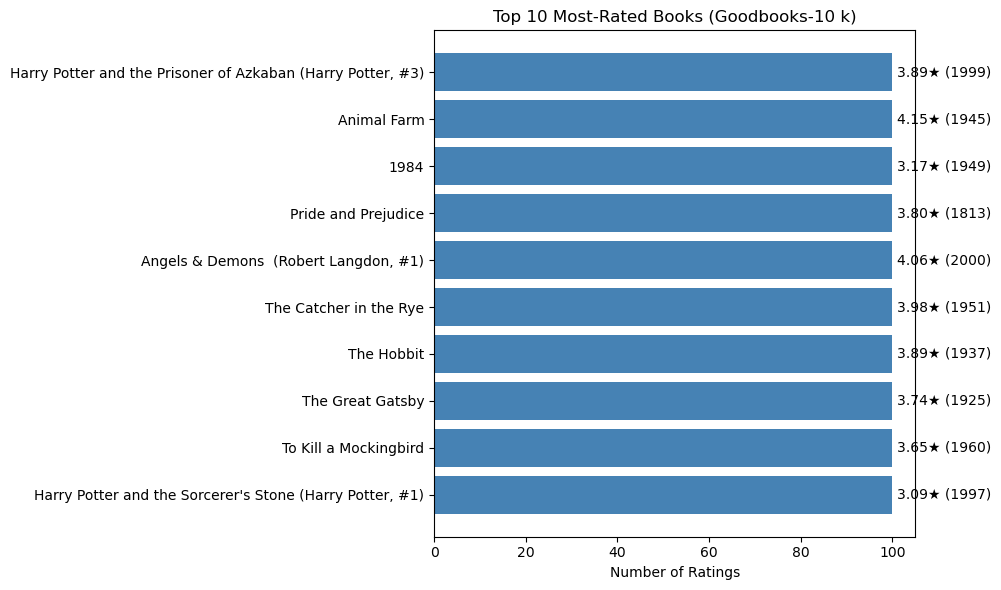

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load raw data
ratings = pd.read_csv('./data/ratings.csv')   # user_id, book_id, rating
books   = pd.read_csv('./data/books.csv')     # book_id, title, original_publication_year, etc.


# Compute per-book counts & average
stats = (
    ratings
    .groupby('book_id', as_index=False)
    .agg(
        ratings_count=('rating', 'count'),
        avg_rating    =('rating', 'mean')
    )
)

# Merge with book metadata
df = books[['book_id', 'title', 'original_publication_year']].merge(
    stats, on='book_id', how='inner'
)

# Select the Top-10 by ratings_count
top10 = (
    df
    .nlargest(10, 'ratings_count')
    [['title', 'ratings_count', 'avg_rating', 'original_publication_year']]
    .sort_values('ratings_count')
)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10['title'], top10['ratings_count'], color='steelblue')
plt.xlabel('Number of Ratings')
plt.title('Top 10 Most‐Rated Books (Goodbooks-10 k)')

# Annotate each bar with "avg_rating (year)"
for i, row in enumerate(top10.itertuples()):
    plt.text(
        row.ratings_count * 1.01,
        i,
        f"{row.avg_rating:.2f}★ ({int(row.original_publication_year)})",
        va='center'
    )

plt.tight_layout()
plt.show()

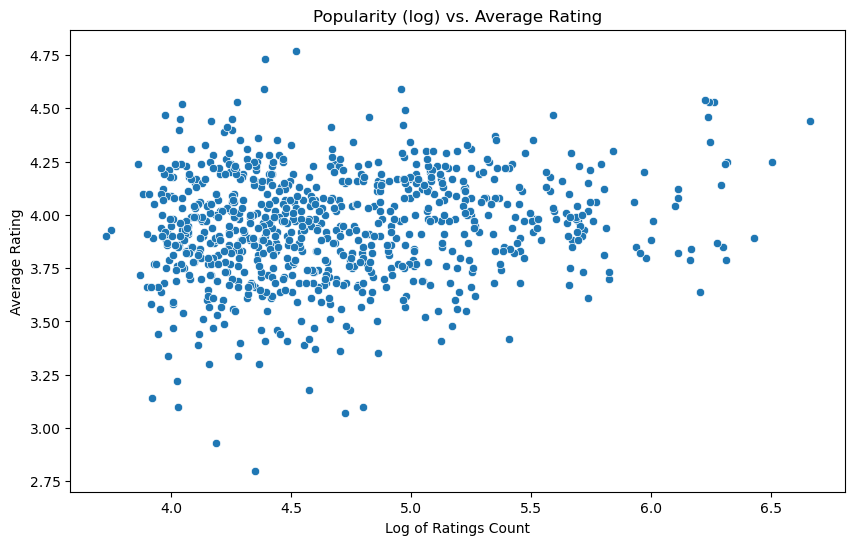

Regression coefficient: 0.0701, Intercept: 3.6119


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Drop zeroes to avoid log(0)
books = books[books['ratings_count_x'] > 0]

# Create the log-count column
books['log_ratings_count'] = np.log10(books['ratings_count_x'])

# Plot using the exact column names
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=books,
    x='log_ratings_count',
    y='average_rating'
)
plt.title('Popularity (log) vs. Average Rating')
plt.xlabel('Log of Ratings Count')
plt.ylabel('Average Rating')
plt.show()

# Fit your regression
X = books[['log_ratings_count']].values
y = books['average_rating'].values
reg = LinearRegression().fit(X, y)
print(f'Regression coefficient: {reg.coef_[0]:.4f}, Intercept: {reg.intercept_:.4f}')


Pearson r = -0.02 (p = 0.0274)
Linear fit: avg_rating = -0.203*log10(count) + 4.261  (R² = 0.00)

Popular & highly-rated outliers:
Series([], Name: title, dtype: object)


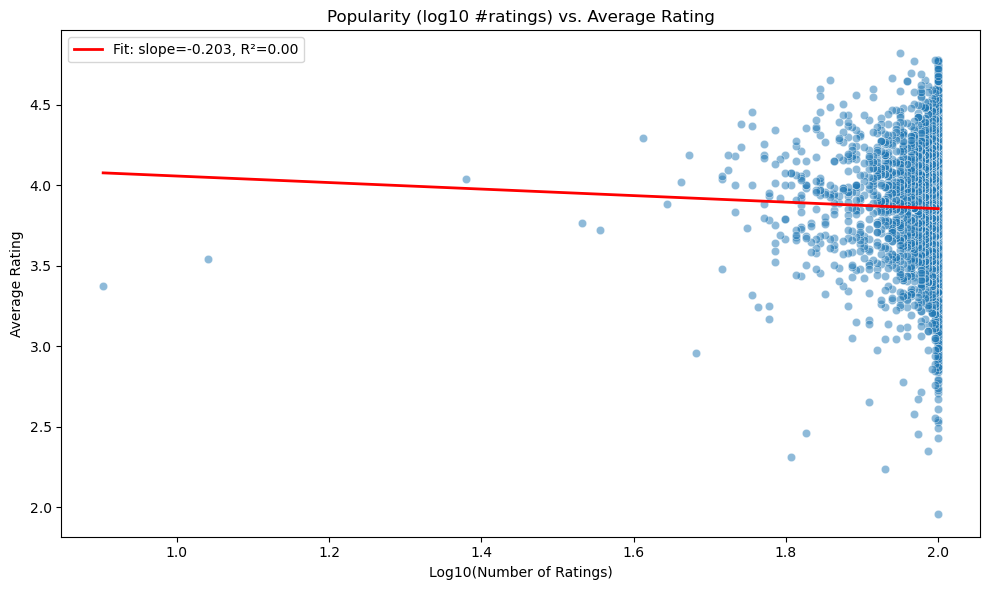

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Compute per-book stats
ratings_count = ratings['book_id'].value_counts().rename('ratings_count')
avg_rating    = ratings.groupby('book_id')['rating'].mean().rename('avg_rating')
stats = pd.concat([ratings_count, avg_rating], axis=1)

# Compute Pearson correlation
corr, pval = pearsonr(np.log10(stats['ratings_count']), stats['avg_rating'])
print(f"Pearson r = {corr:.2f} (p = {pval:.3g})")

# Fit linear regression
X = np.log10(stats['ratings_count']).values.reshape(-1, 1)
y = stats['avg_rating'].values
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)
slope = model.coef_[0]
intercept = model.intercept_
print(f"Linear fit: avg_rating = {slope:.3f}*log10(count) + {intercept:.3f}  (R² = {r2:.2f})")

# Identify a couple of notable outliers by name
popular_mask = stats['ratings_count'] > 10000
high_rating  = stats[ popular_mask ].sort_values('avg_rating', ascending=False).head(3)
print("\nPopular & highly-rated outliers:")
print(books.set_index('book_id').loc[high_rating.index, 'title'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log10(stats['ratings_count']), y=stats['avg_rating'], alpha=0.5)
# regression line
x_line = np.linspace(np.log10(stats['ratings_count']).min(),
                     np.log10(stats['ratings_count']).max(), 100).reshape(-1,1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Fit: slope={slope:.3f}, R²={r2:.2f}')

# Annotate example outliers
for book_id in high_rating.index[:3]:
    x0 = np.log10(stats.loc[book_id, 'ratings_count'])
    y0 = stats.loc[book_id, 'avg_rating']
    title = books.loc[books['book_id']==book_id, 'title'].values[0]
    plt.text(x0, y0+0.02, title, fontsize=9)

plt.title('Popularity (log10 #ratings) vs. Average Rating')
plt.xlabel('Log10(Number of Ratings)')
plt.ylabel('Average Rating')
plt.legend()
plt.tight_layout()
plt.show()


Pearson r = 0.01 (p = 0.817)
Fit: avg_rating = 0.087·log_count + 3.688  (R² = 0.00)


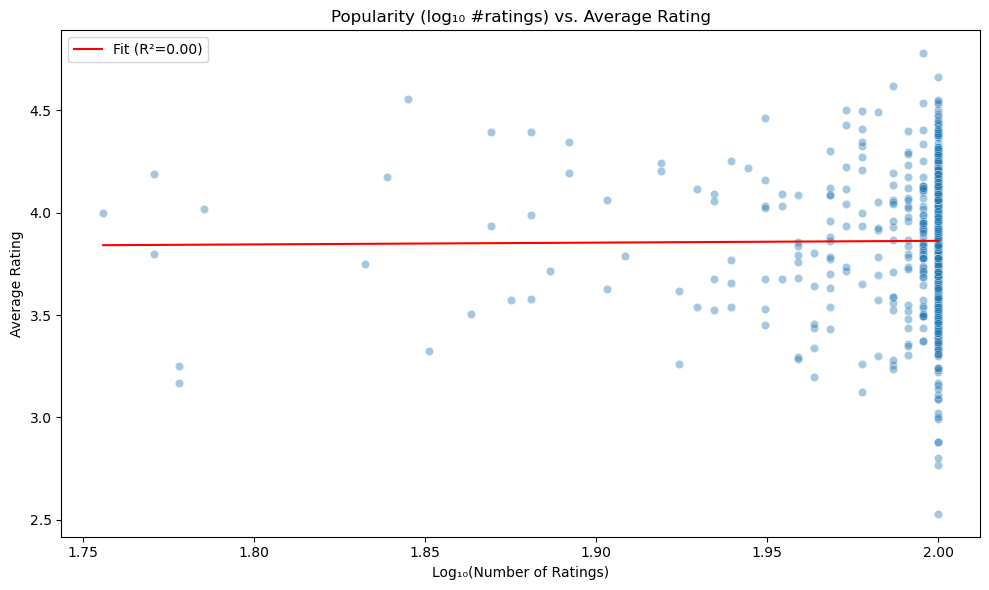

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr


# Compute ratings_count and true average_rating from ratings.csv
stats = ratings.groupby('book_id')['rating'] \
               .agg(ratings_count='count', avg_rating_calc='mean') \
               .reset_index()

# Merge with books metadata
df = books.merge(stats, on='book_id', how='inner')

# Filter and create log column
df = df[df['ratings_count'] > 0].copy()
df['log_ratings_count'] = np.log10(df['ratings_count'])

# Compute correlation and regression
corr, pval = pearsonr(df['log_ratings_count'], df['avg_rating_calc'])
model = LinearRegression().fit(
    df[['log_ratings_count']], df['avg_rating_calc']
)
r2 = model.score(df[['log_ratings_count']], df['avg_rating_calc'])
slope = model.coef_[0]
intercept = model.intercept_

print(f"Pearson r = {corr:.2f} (p = {pval:.3g})")
print(f"Fit: avg_rating = {slope:.3f}·log_count + {intercept:.3f}  (R² = {r2:.2f})")

# Identify a few popular and high-rated outliers
outliers = df[df['ratings_count'] > 10000].nlargest(3, 'avg_rating_calc')

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='log_ratings_count',
    y='avg_rating_calc',
    alpha=0.4
)
# regression line
x_vals = np.linspace(df['log_ratings_count'].min(), df['log_ratings_count'].max(), 100)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color='red', label=f'Fit (R²={r2:.2f})')

# annotate
for _, row in outliers.iterrows():
    plt.text(row['log_ratings_count'], row['avg_rating_calc']+0.02,
             row['title'], fontsize=9)

plt.title('Popularity (log₁₀ #ratings) vs. Average Rating')
plt.xlabel('Log₁₀(Number of Ratings)')
plt.ylabel('Average Rating')
plt.legend()
plt.tight_layout()
plt.show()


Pearson r = 0.01, p = 0.817; regression slope = 0.0871, R² = 0.00


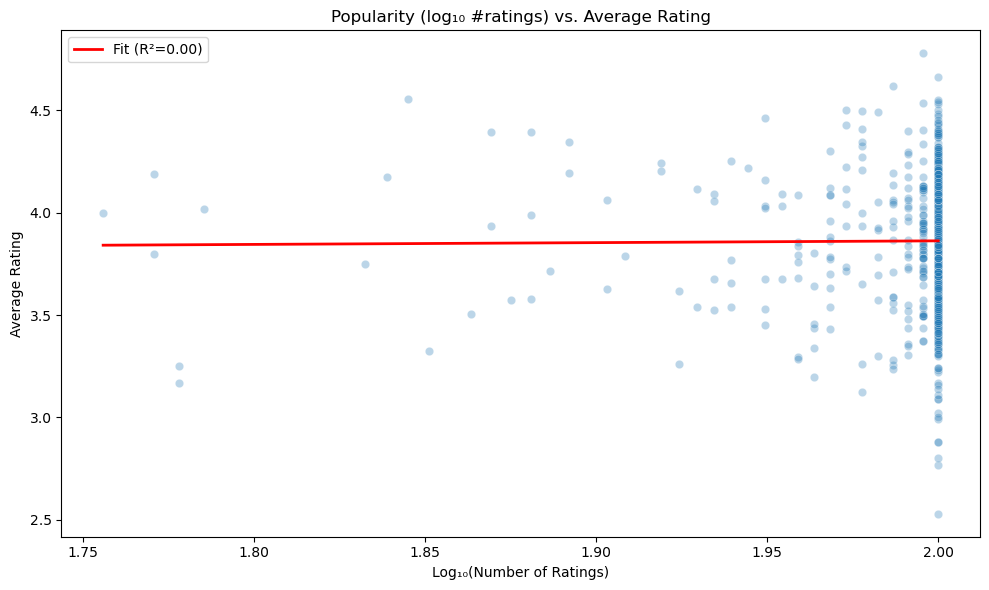

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr


# Compute popularity and average rating per book
stats = (
    ratings
    .groupby('book_id')['rating']
    .agg(ratings_count='count', avg_rating='mean')
    .reset_index()
)

# Merge with metadata
df = books.merge(stats, on='book_id', how='inner')

# Log-transform popularity
df = df[df['ratings_count'] > 0].copy()
df['log_ratings_count'] = np.log10(df['ratings_count'])

# Correlation & regression
r, pval = pearsonr(df['log_ratings_count'], df['avg_rating'])
model   = LinearRegression().fit(
    df[['log_ratings_count']], df['avg_rating']
)
r2      = model.score(df[['log_ratings_count']], df['avg_rating'])
slope   = model.coef_[0]
inter   = model.intercept_
print(f"Pearson r = {r:.2f}, p = {pval:.3g}; regression slope = {slope:.4f}, R² = {r2:.2f}")

# Plot scatter + flat regression line
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='log_ratings_count',
    y='avg_rating',
    alpha=0.3
)
# regression line
x_range = np.array([df['log_ratings_count'].min(), df['log_ratings_count'].max()])
y_line  = slope * x_range + inter
plt.plot(x_range, y_line, color='red', linewidth=2, label=f'Fit (R²={r2:.2f})')

plt.title('Popularity (log₁₀ #ratings) vs. Average Rating')
plt.xlabel('Log₁₀(Number of Ratings)')
plt.ylabel('Average Rating')
plt.legend()
plt.tight_layout()
plt.show()


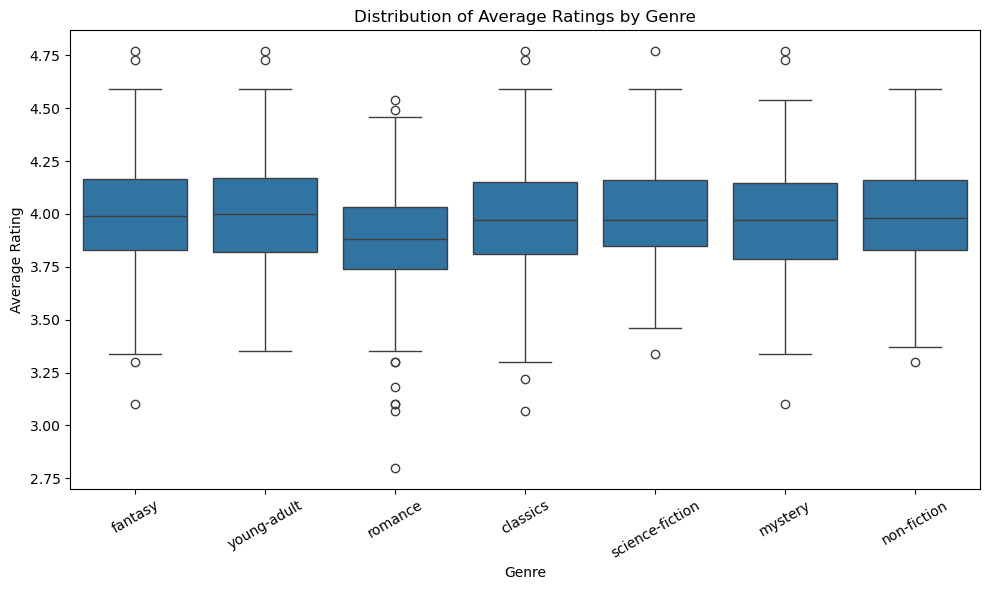

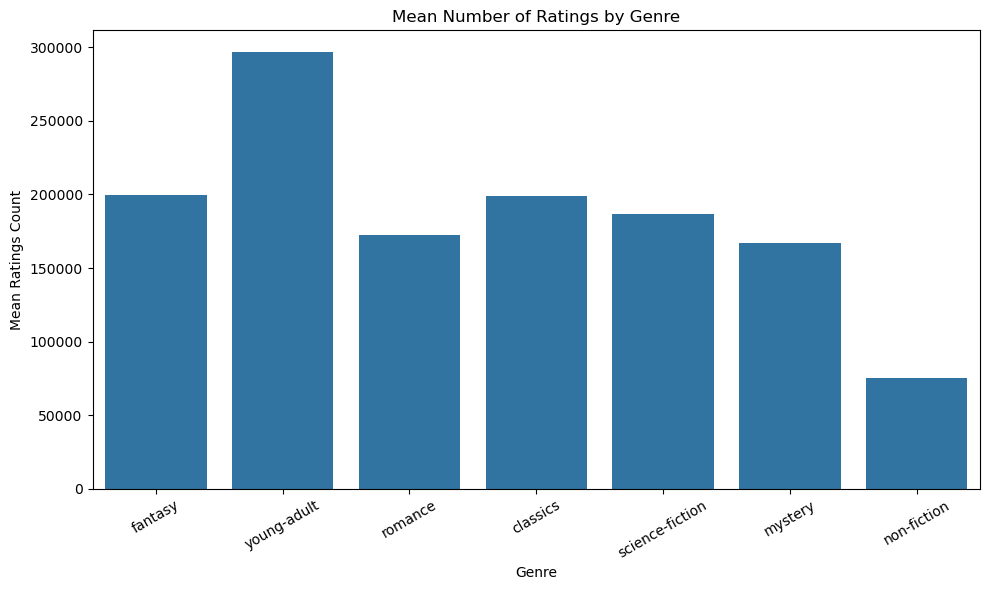

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rename the merged columns
books = books.rename(columns={
    'average_rating_x': 'average_rating',
    'ratings_count_x':  'ratings_count'
})

pivot = (
    book_tags
    .merge(tags, on='tag_id', how='inner')
    .pivot_table(
        index='goodreads_book_id',
        columns='tag_name',
        values='count',
        aggfunc='sum',
        fill_value=0
    )
)

# Define your major genres
major_genres = [
    'fantasy', 'young-adult', 'romance',
    'classics', 'science-fiction', 'mystery', 'non-fiction'
]

# Flag each genre on your books DF
for genre in major_genres:
    books[genre] = books['book_id'].map(
        pivot.get(genre, pd.Series(dtype=int))
    ).fillna(0).astype(int) > 0

# Melt into long form
melted = books.melt(
    id_vars=['book_id','title','average_rating','ratings_count'],
    value_vars=major_genres,
    var_name='genre',
    value_name='has_genre'
)
genre_df = melted[melted['has_genre']]

# Boxplot of average_rating by genre
plt.figure(figsize=(10,6))
sns.boxplot(
    data=genre_df,
    x='genre',
    y='average_rating',
    order=major_genres
)
plt.title('Distribution of Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Barplot of mean ratings_count by genre
mean_pop = genre_df.groupby('genre')['ratings_count'] \
                   .mean() \
                   .reindex(major_genres)
plt.figure(figsize=(10,6))
sns.barplot(x=mean_pop.index, y=mean_pop.values)
plt.title('Mean Number of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Ratings Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


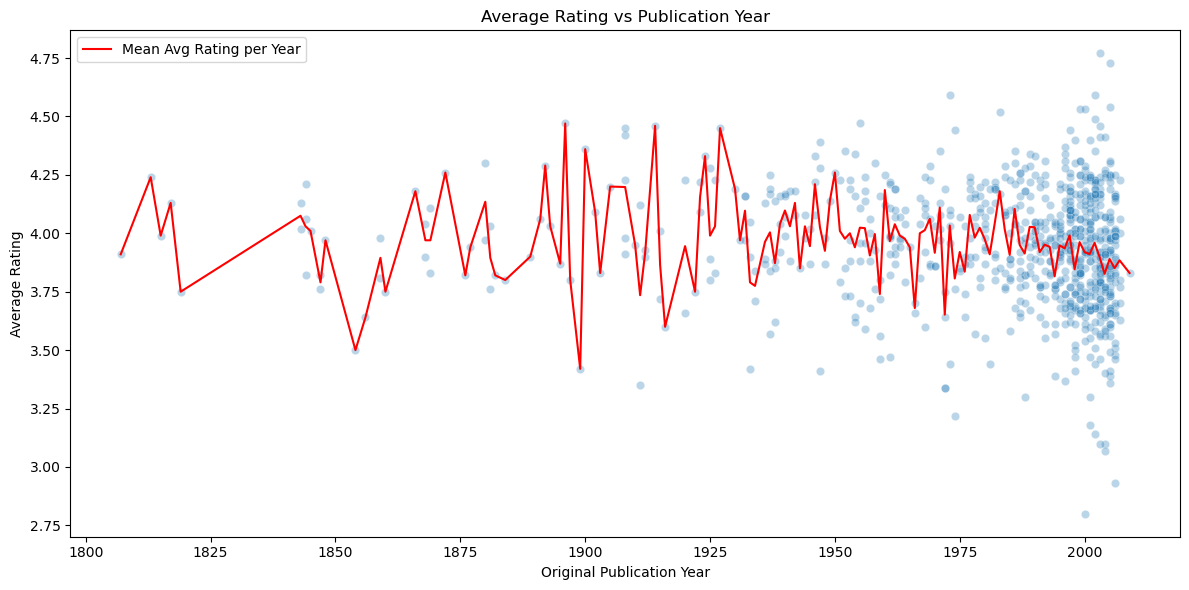

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to valid publication years
df_year = books.dropna(subset=['original_publication_year']).copy()
df_year = df_year[
    (df_year['original_publication_year'] >= 1800) &
    (df_year['original_publication_year'] <= 2020)
]

# Compute mean rating per year
year_stats = df_year.groupby('original_publication_year')['average_rating'] \
                    .mean().reset_index(name='mean_avg_rating')

# Plot scatter + trend line
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_year,
    x='original_publication_year',
    y='average_rating',
    alpha=0.3
)
sns.lineplot(
    data=year_stats,
    x='original_publication_year',
    y='mean_avg_rating',
    color='red',
    label='Mean Avg Rating per Year'
)
plt.title('Average Rating vs Publication Year')
plt.xlabel('Original Publication Year')
plt.ylabel('Average Rating')
plt.legend()
plt.tight_layout()
plt.show()


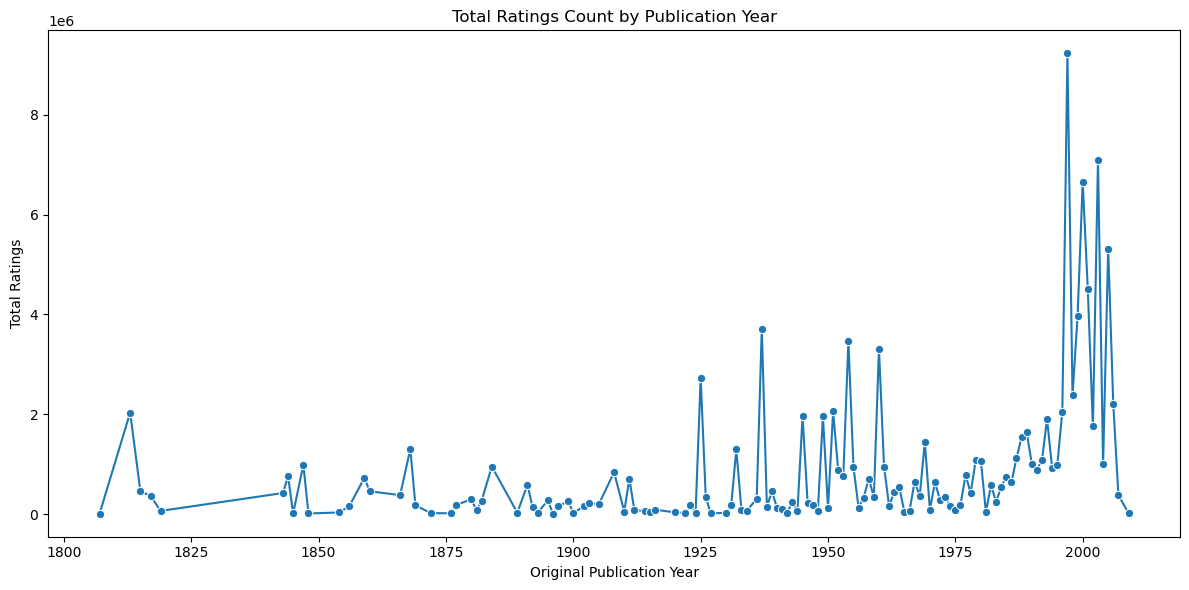

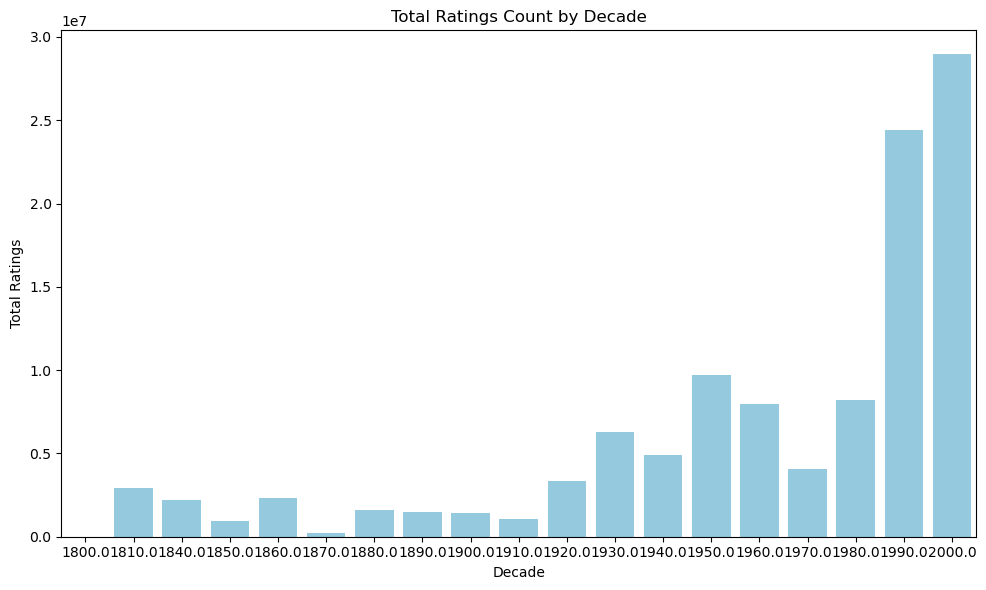

Pride and Prejudice (published 1813) has 2035490.0 ratings


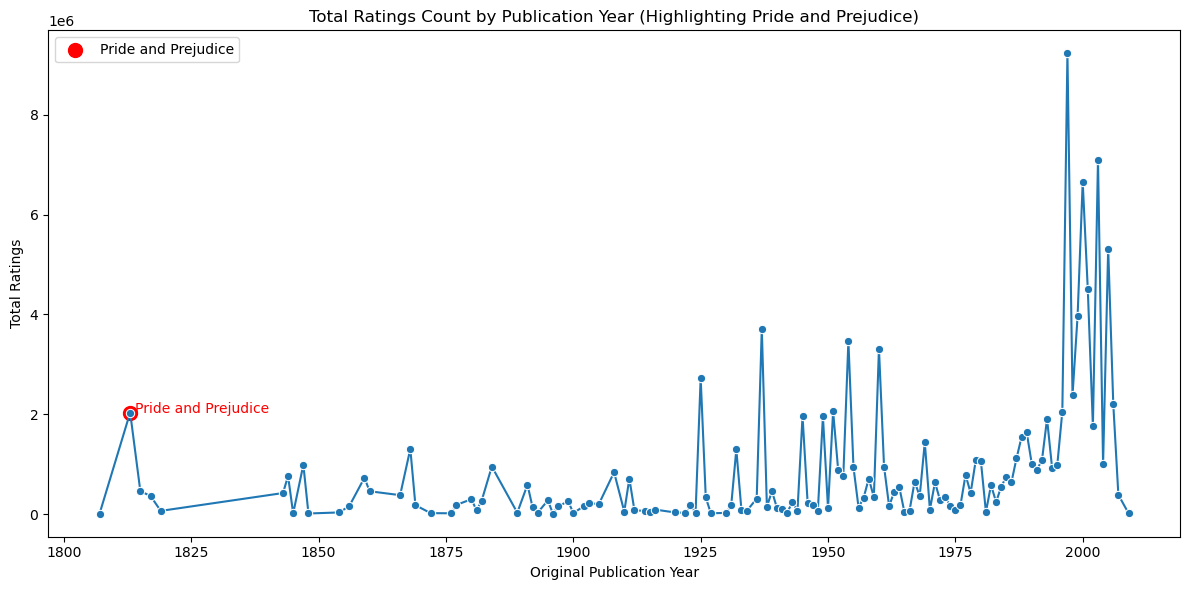

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare books DataFrame
# Rename and ensure correct columns
books = books.rename(columns={'ratings_count_x': 'ratings_count',
                              'average_rating_x': 'average_rating'})

# Filter valid years
df_year = books.dropna(subset=['original_publication_year']).copy()
df_year = df_year[(df_year['original_publication_year'] >= 1800) &
                  (df_year['original_publication_year'] <= 2020)]

# Total ratings per publication year
year_pop = df_year.groupby('original_publication_year')['ratings_count'].sum().reset_index()

# Plot line of popularity over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_pop, x='original_publication_year', y='ratings_count', marker='o')
plt.title('Total Ratings Count by Publication Year')
plt.xlabel('Original Publication Year')
plt.ylabel('Total Ratings')
plt.tight_layout()
plt.show()

# Compute total ratings per decade
year_pop['decade'] = (year_pop['original_publication_year'] // 10) * 10
decade_pop = year_pop.groupby('decade')['ratings_count'].sum().reset_index()

# Bar chart for decades
plt.figure(figsize=(10, 6))
sns.barplot(data=decade_pop, x='decade', y='ratings_count', color='skyblue')
plt.title('Total Ratings Count by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Ratings')
plt.tight_layout()
plt.show()

# Highlight "Pride and Prejudice"
pp = df_year[df_year['title'] == 'Pride and Prejudice'][['original_publication_year', 'ratings_count']].iloc[0]
print(f"Pride and Prejudice (published {int(pp['original_publication_year'])}) has {pp['ratings_count']} ratings")

# Annotate Pride and Prejudice on the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_pop, x='original_publication_year', y='ratings_count', marker='o')
plt.scatter(pp['original_publication_year'], pp['ratings_count'], color='red', s=100, label='Pride and Prejudice')
plt.text(pp['original_publication_year']+1, pp['ratings_count'], 'Pride and Prejudice', color='red')
plt.title('Total Ratings Count by Publication Year (Highlighting Pride and Prejudice)')
plt.xlabel('Original Publication Year')
plt.ylabel('Total Ratings')
plt.legend()
plt.tight_layout()
plt.show()


### Multivariate Analysis

Genre-Based Clustering

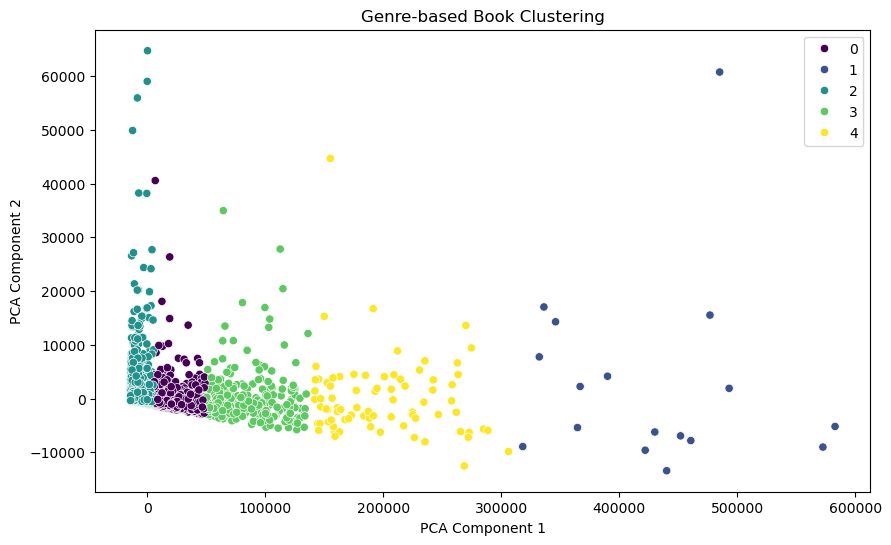

In [ ]:
tags_merged = book_tags.merge(tags, left_on='tag_id', right_on='tag_id')
tags_pivot = tags_merged.pivot_table(index='goodreads_book_id', columns='tag_name', values='count', fill_value=0)

# PCA for dimensionality reduction
pca = PCA(n_components=10)
tags_pca = pca.fit_transform(tags_pivot)

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tags_pca)

# Visualizing clusters with PCA
pca_2d = PCA(n_components=2).fit_transform(tags_pivot)
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_2d[:,0], y=pca_2d[:,1], hue=clusters, palette='viridis', legend='full')
plt.title('Genre-based Book Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Publication Year Trends

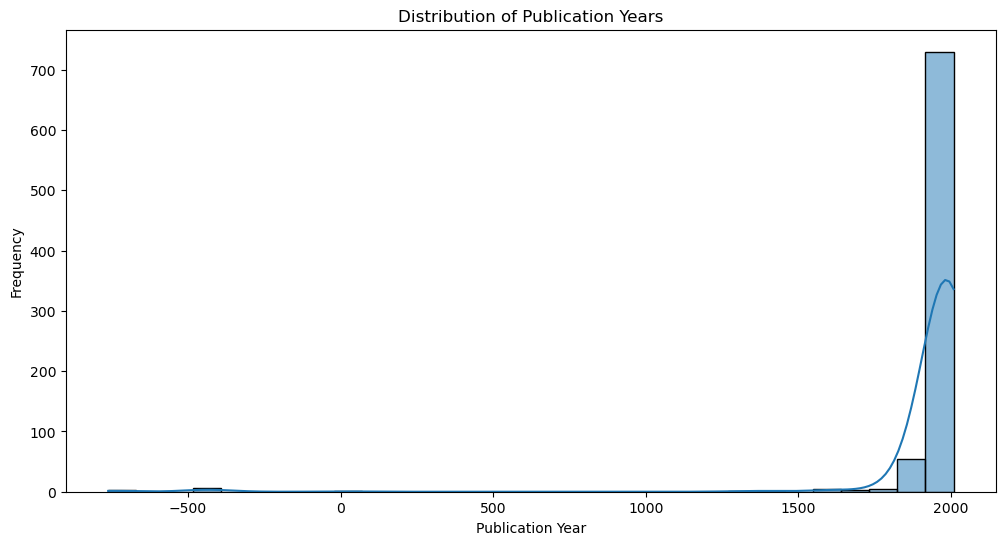

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(books['original_publication_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.show()

Heatmap of Genre Correlations

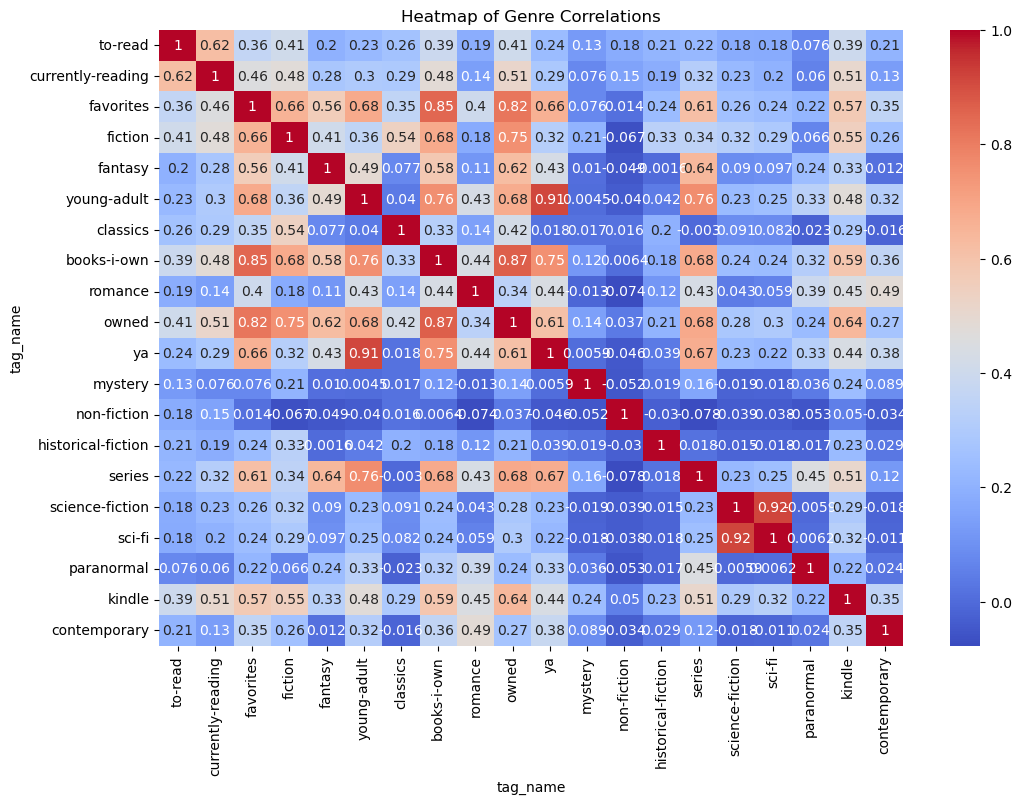

In [ ]:
top_tags = tags_pivot.sum().sort_values(ascending=False).head(20).index
tags_corr = tags_pivot[top_tags].corr()

plt.figure(figsize=(12,8))
sns.heatmap(tags_corr, cmap='coolwarm', annot=True)
plt.title('Heatmap of Genre Correlations')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


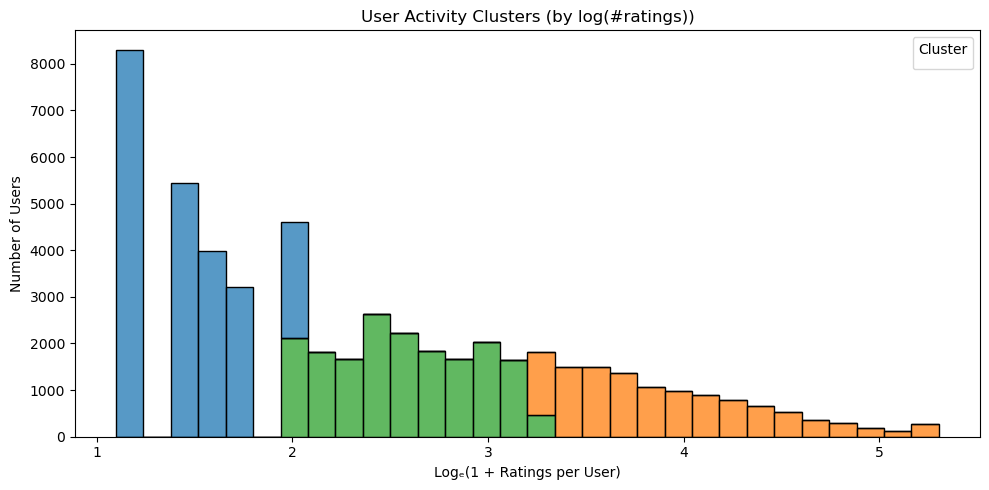

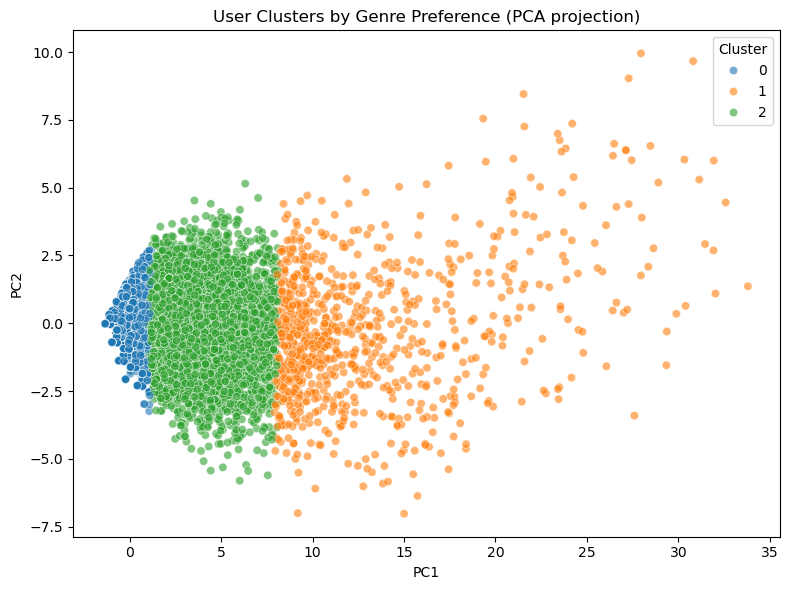

<Figure size 1000x600 with 0 Axes>

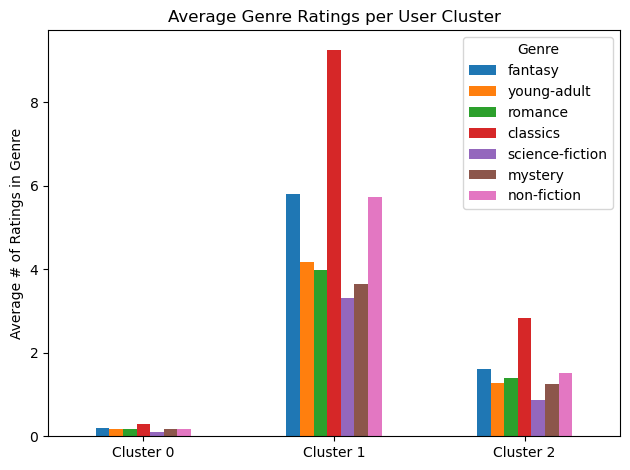

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load / Prepare DataFrames
major_genres = ['fantasy','young-adult','romance','classics',
                'science-fiction','mystery','non-fiction']

# User Activity Clustering
# Compute number of ratings per user
ratings_per_user = ratings.groupby('user_id').size().rename('count')
log_rpu = np.log1p(ratings_per_user)  # log(1 + count)

# KMeans on log-count
k_act = KMeans(n_clusters=3, random_state=42)
clusters_act = k_act.fit_predict(log_rpu.values.reshape(-1,1))

# Attach clusters back for plotting
activity_df = pd.DataFrame({
    'user_id': ratings_per_user.index,
    'log_count': log_rpu.values,
    'cluster': clusters_act
})

# Plot histogram of log-counts colored by cluster
plt.figure(figsize=(10,5))
sns.histplot(activity_df,
             x='log_count',
             hue='cluster',
             bins=30,
             palette='tab10',
             multiple='stack')
plt.title('User Activity Clusters (by log(#ratings))')
plt.xlabel('Logₑ(1 + Ratings per User)')
plt.ylabel('Number of Users')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# User Genre-Preference Clustering
# Build user and genre count matrix
user_genre = (
    ratings[['user_id','book_id']]
    .merge(books[['book_id'] + major_genres], on='book_id', how='left')
    .groupby('user_id')[major_genres]
    .sum()
)

# KMeans on raw genre counts
k_gen = KMeans(n_clusters=3, random_state=42)
clusters_gen = k_gen.fit_predict(user_genre)

# PCA to 2D for visualization
pca = PCA(n_components=2, random_state=42)
user_pca = pca.fit_transform(user_genre.fillna(0))

genre_df = pd.DataFrame({
    'PC1': user_pca[:,0],
    'PC2': user_pca[:,1],
    'cluster': clusters_gen
})

# Scatter of users in PC-space
plt.figure(figsize=(8,6))
sns.scatterplot(data=genre_df,
                x='PC1', y='PC2',
                hue='cluster', palette='tab10', alpha=0.6)
plt.title('User Clusters by Genre Preference (PCA projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Inspect Cluster Centroids
centroids = pd.DataFrame(k_gen.cluster_centers_,
                         columns=major_genres,
                         index=[f'Cluster {i}' for i in range(3)])

# Bar chart of average genre counts per cluster
plt.figure(figsize=(10,6))
centroids.plot(kind='bar', rot=0)
plt.title('Average Genre Ratings per User Cluster')
plt.ylabel('Average # of Ratings in Genre')
plt.legend(title='Genre', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Select Top-10 by ratings_count_x
top10 = (
    books
    .nlargest(10, 'ratings_count_x')
    [['title', 'ratings_count_x', 'average_rating_x', 'original_publication_year']]
    .sort_values('ratings_count_x')
)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10['title'], top10['ratings_count_x'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.title('Top 10 Most-Rated Books (Goodbooks-10k)')

# Annotate each bar with "avg_rating★ (year)"
for y, (cnt, avg, yr) in enumerate(zip(
        top10['ratings_count_x'],
        top10['average_rating_x'],
        top10['original_publication_year']
    )):
    plt.text(cnt + cnt*0.02, y, f'{avg:.2f}★ ({int(yr)})', va='center')

plt.tight_layout()
plt.show()
